# Incremental (Online) Learning with Scikit-Multiflow- upload data

In [2]:
%matplotlib notebook

In [3]:
from skmultiflow.data import FileStream
from skmultiflow.trees import HoeffdingTree
import matplotlib.pyplot as plt
from skmultiflow.evaluation import EvaluatePrequential

In [4]:
stream = FileStream("D:/Streaming data set/streaming-datasets-master/airlines.csv")

In [5]:
stream.prepare_for_use()

C:\Users\JaFsi\anaconda3\lib\site-packages\skmultiflow\data\base_stream.py:194: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  category=FutureWarning)


In [6]:
tree = HoeffdingTree()

C:\Users\JaFsi\anaconda3\lib\site-packages\skmultiflow\trees\hoeffding_tree.py:35: FutureWarning: 'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.
The old name will be removed in v0.7.0
  "The old name will be removed in v0.7.0", category=FutureWarning)


In [16]:
correctness_dist = []
nb_iters = 1000
for i in range(nb_iters):
    X, Y = stream.next_sample()        # get the next sample 
    prediction = tree.predict(X)       # predict Y using the tree     
    if Y == prediction:                # check the prediction
        correctness_dist.append(1)
    else:
        correctness_dist.append(0)   
    tree.partial_fit(X, Y)             # update the tree
   

<IPython.core.display.Javascript object>


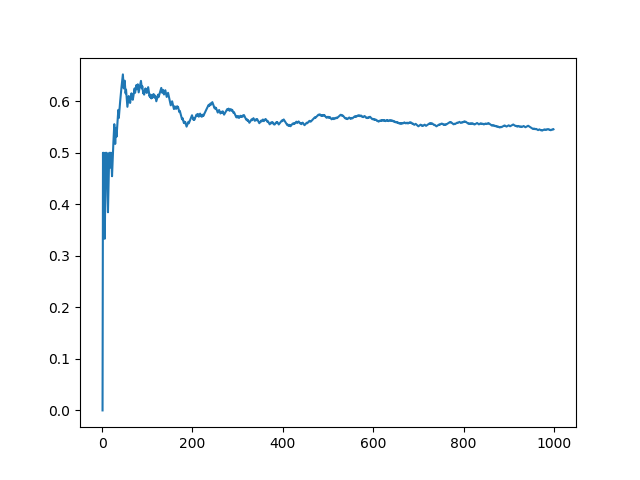

In [17]:
time = [i for i in range(1, nb_iters)]
accuracy = [sum(correctness_dist[:i])/len(correctness_dist[:i]) for i in range(1, nb_iters)]
plt.plot(time, accuracy)

### Alternate method

<IPython.core.display.Javascript object>


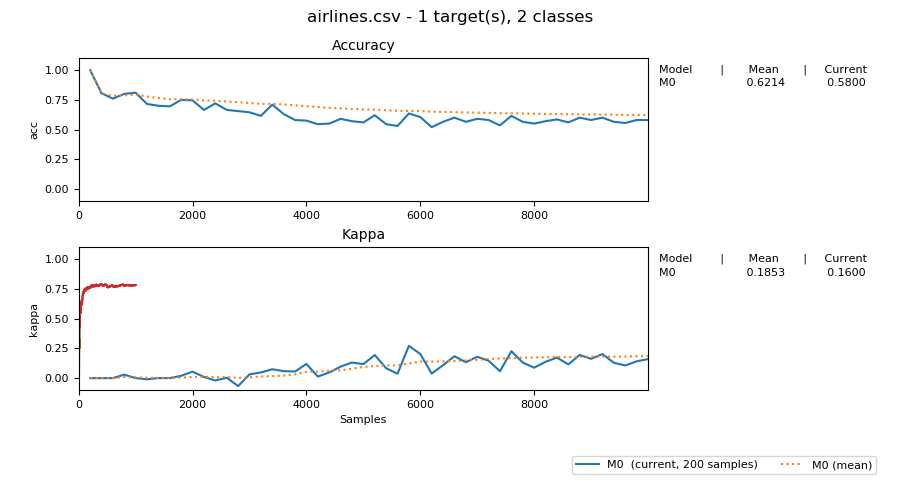

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [6.90s]
Processed samples: 10000
Mean performance:
M0 - Accuracy     : 0.6214
M0 - Kappa        : 0.1853


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [19]:
evaluator=EvaluatePrequential(show_plot=True,max_samples=10000)
evaluator.evaluate(stream=stream, model=tree)

## Naive Bayes Classifier

In [20]:
from skmultiflow.bayes import NaiveBayes

NB = NaiveBayes()

In [21]:
correctness_dist = []
nb_iters = 1000
for i in range(nb_iters):
   X, Y = stream.next_sample()        # get the next sample
   prediction = NB.predict(X)       # predict Y using the classifier     
   if Y == prediction:                # check the prediction
     correctness_dist.append(1)
   else:
     correctness_dist.append(0)   
   
   NB.partial_fit(X, Y) 

In [23]:
time = [i for i in range(1, nb_iters)]
accuracy = [sum(correctness_dist[:i])/len(correctness_dist[:i]) for i in range(1, nb_iters)]
plt.plot(time, accuracy)

## Very Fast Decision Rules classifier

In [27]:
from skmultiflow.rules import VeryFastDecisionRulesClassifier

VFDR = VeryFastDecisionRulesClassifier()

No Nominal attributes have been defined, will consider all attributes as numerical


In [28]:
correctness_dist = []
nb_iters = 1000
for i in range(nb_iters):
   X, Y = stream.next_sample()        # get the next sample
   prediction = VFDR.predict(X)       # predict Y using the classifier     
   if Y == prediction:                # check the prediction
     correctness_dist.append(1)
   else:
     correctness_dist.append(0)   
   
   VFDR.partial_fit(X, Y) 

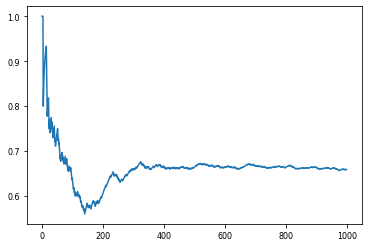

In [29]:
time = [i for i in range(1, nb_iters)]
accuracy = [sum(correctness_dist[:i])/len(correctness_dist[:i]) for i in range(1, nb_iters)]
plt.plot(time, accuracy)